<a href="https://colab.research.google.com/github/ro-hitr/genai-exchange-croma-nullpointerexception/blob/feature%2Floc-prediction/Croma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Obtaining Data

In [ ]:
# importing the dataset
data = pd.read_csv('user_attribures.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# displaying the first 5 rows of dataset, to get an idea of the data in hand
data.head(5)

,user_id,name,email,gender,age,location,account_creation_date,last_login_date,total_spent,transaction_frequency,average_transaction_value,last_transaction_date,number_of_transactions,favorite_payment_method,purchase_channel,preferred_device,preferred_language,time_on_site,page_views_per_session,average_cart_value,abandoned_cart_count,product_browsing_history,loyalty_program_member,loyalty_points_balance,email_open_rate,email_click_rate,SMS_opt_in,SMS_click_rate,best_time_in_the_day,best_day_in_a_week,best_week_in_a_month,coupon_usage_frequency,social_media_engagement,number_of_reviews_written,average_review_rating,referral_count,customer_service_interactions,live_chat_use_frequency,marketing_segment,campaign_engagement_score,preferred_communication_channel,click_through_rate,conversion_rate,discount_usage_rate,preferred_brand,brand_loyalty_index,lifetime_value_estimate,frequency_of_visits_per_week,returning_customer,shopping_basket_value,cart_conversion_rate,purchase_value_category,transaction_frequency_category,product_affinity,discount_affinity
0,94277,Julie Mcdaniel,kyle41@yahoo.com,F,57,New Kathleen,2024-05-31 00:00:00,2024-06-21 00:00:00,7181.36,5,1436.27,2024-01-21 00:00:00,5,Credit Card,online,desktop,Spanish,48,9,1436.27,0,school,False,1977,84.49,94.40,False,93.10,12,Friday,4,15.18,80,16,4.15,2,5,13,D,18,SMS,4.45,2.58,29.54,"Wade, Chandler and Romero",78,7181.36,5,True,1436.27,58.95,HV,HF,"Dress, Jeans, T-shirt",10
1,61121,Anthony Jacobs,allen36@yahoo.com,M,65,Davidmouth,2024-04-20 00:00:00,2024-03-20 00:00:00,4676.37,2,2338.18,2024-05-09 00:00:00,2,PayPal,in-store,desktop,French,99,5,2338.18,5,fly,False,2593,91.45,26.97,False,38.71,20,Tuesday,1,69.55,96,2,4.58,9,5,18,A,100,push notifications,5.16,0.72,99.54,Harris-Houston,6,4676.37,1,False,2338.18,22.40,HV,LF,"Jacket, Sweater, T-shirt",20
2,67609,Anna Martin,clarkmaurice@hotmail.com,F,65,West Michellefurt,2024-02-23 00:00:00,2024-02-03 00:00:00,86.95,4,21.74,2024-01-10 00:00:00,4,PayPal,in-store,mobile,Spanish,48,2,21.74,3,"throw, it, site",True,4488,72.38,59.82,True,40.32,0,Friday,5,31.10,11,9,4.20,1,8,11,B,11,email,4.62,9.76,68.51,Summers-Rosario,23,86.95,1,False,21.74,89.60,LV,HF,"Jeans, Sweater, Jacket",30
3,54233,Derek Johnston,yolandacarter@yahoo.com,M,26,North Todd,2024-01-21 00:00:00,2024-05-23 00:00:00,57.79,2,28.89,2024-03-09 00:00:00,2,PayPal,in-store,mobile,French,94,5,28.89,0,"central, focus",True,212,12.06,6.27,True,87.21,16,Thursday,2,57.00,25,11,3.85,2,2,38,B,35,email,4.18,0.61,27.22,"Roberts, Schultz and Simpson",49,57.79,4,True,28.89,62.09,LV,LF,"Sweater, T-shirt",20
4,72541,Dr. Lucas Jennings,bryanlivingston@yahoo.com,M,28,New Melody,2024-02-18 00:00:00,2024-01-25 00:00:00,9020.45,1,9020.45,2024-03-02 00:00:00,1,PayPal,online,desktop,English,107,2,9020.45,5,"technology, door, rule, tough, kid",True,4361,24.80,47.91,False,25.89,12,Monday,5,25.96,50,20,1.87,0,10,30,B,20,SMS,3.58,4.43,59.63,Alexander-Tucker,61,9020.45,4,False,9020.45,94.95,HV,LF,"Hoodie, Dress, Jeans",10


# 2. Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   user_id                          400000 non-null  int64  
 1   name                             400000 non-null  object 
 2   email                            400000 non-null  object 
 3   gender                           400000 non-null  object 
 4   age                              400000 non-null  int64  
 5   location                         400000 non-null  object 
 6   account_creation_date            400000 non-null  object 
 7   last_login_date                  400000 non-null  object 
 8   total_spent                      400000 non-null  float64
 9   transaction_frequency            400000 non-null  int64  
 10  average_transaction_value        400000 non-null  float64
 11  last_transaction_date            400000 non-null  object 
 12  nu

Observations made from the above o/p -



1.   There are no null values for any of the features in the dataset
2.   There are 4,00,000 records with 55 features
3. The features have a mix of datatypes.




Let us check below to see if gender has clean values or needs some processing

In [ ]:
data.gender.value_counts()

,count
gender,
F,200152
M,199848


The above output shows that the variable is clean, and there is no problem of class imbalance as well, both the categories are closely equal in number <br>

Let us move onto age to check if there are any outliers, or the customers are in good range of age

In [ ]:
data.age.describe()

,age
count,400000.000000
mean,41.504413
std,13.844826
min,18.000000
25%,30.000000
50%,41.000000
75%,53.000000
max,65.000000


From the above output, the mean and median are quite similar, so outliers are not expected, let us plot the age variable and get more insights about outliers

<Axes: >

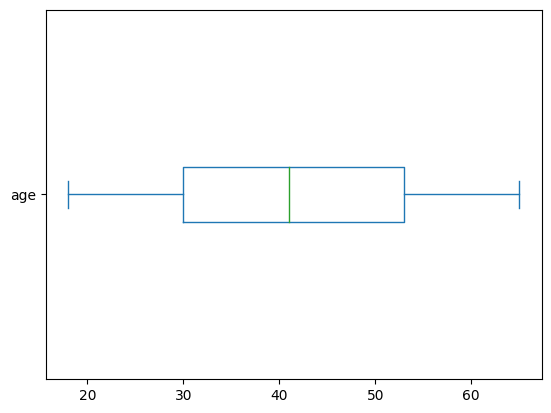

In [ ]:
data.age.plot(kind='box',vert=False)

There are no outliers in the age variable. <br>

We can group some of the categorical columns together and find the category's frequency counts

In [ ]:
col_freq_counts = ['location','transaction_frequency','favorite_payment_method','purchase_channel','preferred_device','preferred_language',
                   'preferred_communication_channel','best_day_in_a_week','marketing_segment','purchase_value_category','transaction_frequency_category']
for col in col_freq_counts:
  print(col,len(data[col].value_counts().index),sep=':-')

location:-70521
transaction_frequency:-10
favorite_payment_method:-3
purchase_channel:-2
preferred_device:-2
preferred_language:-3
preferred_communication_channel:-3
best_day_in_a_week:-7
marketing_segment:-4
purchase_value_category:-2
transaction_frequency_category:-2


Only location has got a huge number of categories, other variables have small number of categories. Printing them

In [ ]:
for col in col_freq_counts[1:]:
  print(data[col].value_counts())
  print()

transaction_frequency
1     67231
2     66435
3     66334
5     28728
6     28718
4     28677
8     28632
7     28591
10    28348
9     28306
Name: count, dtype: int64

favorite_payment_method
PayPal         133512
Credit Card    133476
Debit Card     133012
Name: count, dtype: int64

purchase_channel
in-store    200502
online      199498
Name: count, dtype: int64

preferred_device
mobile     200315
desktop    199685
Name: count, dtype: int64

preferred_language
Spanish    133630
French     133383
English    132987
Name: count, dtype: int64

preferred_communication_channel
SMS                   133537
email                 133289
push notifications    133174
Name: count, dtype: int64

best_day_in_a_week
Tuesday      57336
Monday       57328
Saturday     57275
Friday       57142
Thursday     57035
Sunday       57010
Wednesday    56874
Name: count, dtype: int64

marketing_segment
D    100124
B    100096
C     99982
A     99798
Name: count, dtype: int64

purchase_value_category
HV    2000

From the above output, the categories seem to be pretty balanced and there is no class imbalance except for transaction_frequency, which we can work on in case the model traning seems to be giving low scores.

In the below cells, we will be focusing on the numerical variables, and try to find out existence of outliers, extreme data points and conclude if these features require any kind of data pre-processing. <br>

Let us start with a describe().

In [ ]:
num_cols = ['total_spent','average_transaction_value','time_on_site','page_views_per_session','average_cart_value','abandoned_cart_count',
            'loyalty_points_balance','email_open_rate','email_click_rate','SMS_click_rate','coupon_usage_frequency','number_of_reviews_written',
            'referral_count','customer_service_interactions','live_chat_use_frequency','lifetime_value_estimate','shopping_basket_value']
for col in num_cols:
  print(data[col].describe())
  print()

count    400000.000000
mean       2650.285805
std        3240.797893
min           1.000000
25%          50.640000
50%         300.015000
75%        5253.712500
max        9999.900000
Name: total_spent, dtype: float64

count    400000.000000
mean       1020.719827
std        1790.574023
min           0.100000
25%          11.570000
50%          94.320000
75%        1220.467500
max        9999.880000
Name: average_transaction_value, dtype: float64

count    400000.000000
mean         62.511450
std          33.452401
min           5.000000
25%          34.000000
50%          62.000000
75%          91.000000
max         120.000000
Name: time_on_site, dtype: float64

count    400000.000000
mean          5.500318
std           2.868107
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: page_views_per_session, dtype: float64

count    400000.000000
mean       1020.719827
std        1790.574023
min           0.100000
25%   

Let us analyse the above output to find which columns could possibly have outliers and then plot graphs for such features to get even better understanding.

1. **total_spent** :- The mean and the median have huge difference, and the range of the variable is too high as well. This could possibly have outliers.
2. **average_transaction_value** :- The observation for (1) also holds true here.
3. **time_on_site** :- seems good. Mean and median are pretty close, and the range seems fine too from 5 mins to 120 mins.
4. **page_views_per_session** :- all good.
5. **average_cart_value** :- has got the same kind of observations as (1) where the range is too high and mean and median got too much difference as well.
6. **abandoned_cart_count** :- ranges from 0 to 5, and mean and median are close to 2.
7. **loyalty_points_balance** :- The range is high, but the data seems to be well distributed within this high range because the mean & median are almost coinciding. We can still have a check for outliers.
8. **email_open_rate**,**email_click_rate**,**SMS_click_rate**,**coupon_usage_frequency**,**number_of_reviews_written**,**referral_count**,**customer_service_interactions**,**live_chat_use_frequency** :- look good with good range.
9. **lifetime_value_estimate**,**shopping_basket_value** :- Both the variables have high difference in mean & median, with range also large. Could have outliers.

From the above, columns to be analysed for outliers are ['total_spent','average_transaction_value','average_cart_value','loyalty_points_balance','lifetime_value_estimate','shopping_basket_value']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

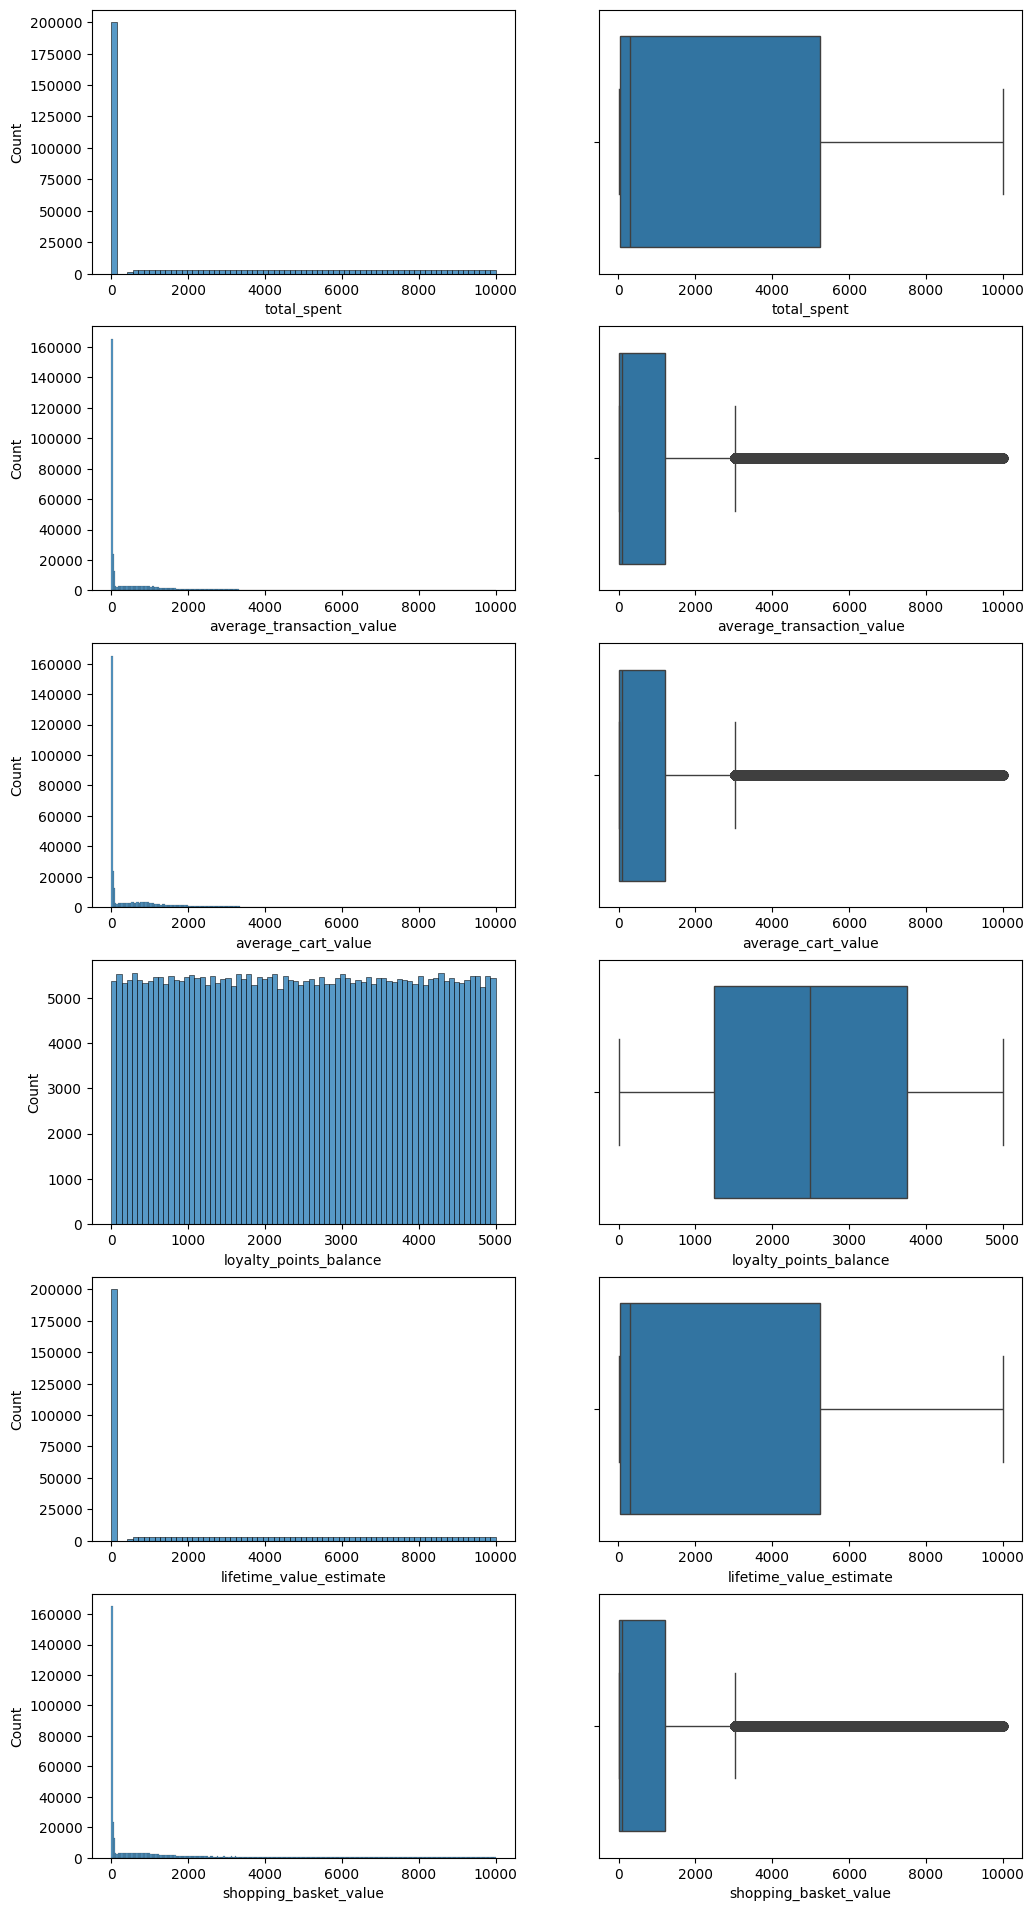

In [ ]:
num_cols_outliers = ['total_spent','average_transaction_value','average_cart_value','loyalty_points_balance',
                     'lifetime_value_estimate','shopping_basket_value']
fig, ax = plt.subplots(nrows=len(num_cols_outliers), ncols=2, figsize=(len(num_cols_outliers)*2, len(num_cols_outliers)*4))
for i in range(0,len(num_cols_outliers)):
  sns.histplot(data[num_cols_outliers[i]], ax=ax[i,0])
  sns.boxplot(data[num_cols_outliers[i]], ax=ax[i,1], orient='h')
plt.show()

Inferences from the above plots -

1. **total_spent** - From the box plot, we can infer that there are no outliers, however, the histogram is heavily skewed. There are a huge number of values within the first thousands, and the remaining data is evenly distributed.
2. **average_transaction_value** - The plots deplict both the presence of outliers and heavy right skewness. There is a sleek long bar in the histogram, and the number of data points outside the preferred range in the boxplot is high too.
3. **average_cart_value** - Based on the graphs, it seems that the distribution of **average_transaction_value** and **average_cart_value** are quite similar, with the values expected to match in most cases. We can have a look at this observation below.
4. **loyalty_points_balance** - good distribution, with even spread and no outliers. Though this data is not normally distributed.
5. **lifetime_value_estimate** - From the plot, it again seems that the variable is closely identical to total_spent.

In [ ]:
data[['lifetime_value_estimate','total_spent']].head(3)

,lifetime_value_estimate,total_spent
0,7181.36,7181.36
1,4676.37,4676.37
2,86.95,86.95


In [ ]:
data['equal'] = data.lifetime_value_estimate == data.total_spent

In [ ]:
data_in_store = data[data.purchase_channel=='in-store']
data_online = data[data.purchase_channel=='online']

data_in_store.shape, data_online.shape

((200502, 56), (199498, 56))

In [ ]:
pd.Index(data_online.location).intersection(pd.Index(data_in_store.location)).unique()

Index(['New Kathleen', 'New Melody', 'Lake Ana', 'North Michaelland',
       'South Nicholas', 'Port Tara', 'Mclaughlinshire', 'New Heather',
       'Santoshaven', 'Stephanieville',
       ...
       'Michelefurt', 'Connieside', 'New Christinehaven', 'West Henryberg',
       'Mcintoshburgh', 'Duartebury', 'Froststad', 'Port Amandaberg',
       'North Scottport', 'Lake Laurieburgh'],
      dtype='object', name='location', length=37067)

In [ ]:
data.head(3)

,user_id,name,email,gender,age,location,account_creation_date,last_login_date,total_spent,transaction_frequency,average_transaction_value,last_transaction_date,number_of_transactions,favorite_payment_method,purchase_channel,preferred_device,preferred_language,time_on_site,page_views_per_session,average_cart_value,abandoned_cart_count,product_browsing_history,loyalty_program_member,loyalty_points_balance,email_open_rate,email_click_rate,SMS_opt_in,SMS_click_rate,best_time_in_the_day,best_day_in_a_week,best_week_in_a_month,coupon_usage_frequency,social_media_engagement,number_of_reviews_written,average_review_rating,referral_count,customer_service_interactions,live_chat_use_frequency,marketing_segment,campaign_engagement_score,preferred_communication_channel,click_through_rate,conversion_rate,discount_usage_rate,preferred_brand,brand_loyalty_index,lifetime_value_estimate,frequency_of_visits_per_week,returning_customer,shopping_basket_value,cart_conversion_rate,purchase_value_category,transaction_frequency_category,product_affinity,discount_affinity,equal
0,94277,Julie Mcdaniel,kyle41@yahoo.com,F,57,New Kathleen,2024-05-31 00:00:00,2024-06-21 00:00:00,7181.36,5,1436.27,2024-01-21 00:00:00,5,Credit Card,online,desktop,Spanish,48,9,1436.27,0,school,False,1977,84.49,94.40,False,93.10,12,Friday,4,15.18,80,16,4.15,2,5,13,D,18,SMS,4.45,2.58,29.54,"Wade, Chandler and Romero",78,7181.36,5,True,1436.27,58.95,HV,HF,"Dress, Jeans, T-shirt",10,True
1,61121,Anthony Jacobs,allen36@yahoo.com,M,65,Davidmouth,2024-04-20 00:00:00,2024-03-20 00:00:00,4676.37,2,2338.18,2024-05-09 00:00:00,2,PayPal,in-store,desktop,French,99,5,2338.18,5,fly,False,2593,91.45,26.97,False,38.71,20,Tuesday,1,69.55,96,2,4.58,9,5,18,A,100,push notifications,5.16,0.72,99.54,Harris-Houston,6,4676.37,1,False,2338.18,22.40,HV,LF,"Jacket, Sweater, T-shirt",20,True
2,67609,Anna Martin,clarkmaurice@hotmail.com,F,65,West Michellefurt,2024-02-23 00:00:00,2024-02-03 00:00:00,86.95,4,21.74,2024-01-10 00:00:00,4,PayPal,in-store,mobile,Spanish,48,2,21.74,3,"throw, it, site",True,4488,72.38,59.82,True,40.32,0,Friday,5,31.10,11,9,4.20,1,8,11,B,11,email,4.62,9.76,68.51,Summers-Rosario,23,86.95,1,False,21.74,89.60,LV,HF,"Jeans, Sweater, Jacket",30,True


In [ ]:
'total_spent','transaction_frequency','average_transaction_value','last_transaction_date_months','average_cart_value','loyalty_program_member','loyalty_points_balance',

('total_spent',
 'transaction_frequency',
 'average_transaction_value',
 'last_transaction_date_months',
 'average_cart_value',
 'loyalty_program_member',
 'loyalty_points_balance')

In [ ]:
data.last_transaction_date.describe()

,last_transaction_date
count,400000
unique,182
top,2024-01-14 00:00:00
freq,2363


In [ ]:
for a in data.columns:
  print(f'* {a}')

* user_id
* name
* email
* gender
* age
* location
* account_creation_date
* last_login_date
* total_spent
* transaction_frequency
* average_transaction_value
* last_transaction_date
* number_of_transactions
* favorite_payment_method
* purchase_channel
* preferred_device
* preferred_language
* time_on_site
* page_views_per_session
* average_cart_value
* abandoned_cart_count
* product_browsing_history
* loyalty_program_member
* loyalty_points_balance
* email_open_rate
* email_click_rate
* SMS_opt_in
* SMS_click_rate
* best_time_in_the_day
* best_day_in_a_week
* best_week_in_a_month
* coupon_usage_frequency
* social_media_engagement
* number_of_reviews_written
* average_review_rating
* referral_count
* customer_service_interactions
* live_chat_use_frequency
* marketing_segment
* campaign_engagement_score
* preferred_communication_channel
* click_through_rate
* conversion_rate
* discount_usage_rate
* preferred_brand
* brand_loyalty_index
* lifetime_value_estimate
* frequency_of_visits_per

**Useful for problem statement #1 - location for new store**

* index
* user_id
* location
* total_spent
* transaction_frequency
* average_transaction_value
* last_transaction_date
* number_of_transactions
* favorite_payment_method
* purchase_channel
* preferred_device
* preferred_language
* time_on_site
* page_views_per_session
* average_cart_value
* abandoned_cart_count
* product_browsing_history
* loyalty_program_member
* loyalty_points_balance
* email_open_rate
* email_click_rate
* SMS_opt_in
* SMS_click_rate
* best_time_in_the_day
* best_day_in_a_week
* best_week_in_a_month
* coupon_usage_frequency
* social_media_engagement
* number_of_reviews_written
* average_review_rating
* referral_count
* customer_service_interactions
* live_chat_use_frequency
* marketing_segment
* campaign_engagement_score
* preferred_communication_channel
* click_through_rate
* conversion_rate
* discount_usage_rate
* preferred_brand
* brand_loyalty_index
* lifetime_value_estimate
* frequency_of_visits_per_week
* returning_customer
* shopping_basket_value
* cart_conversion_rate
* purchase_value_category
* transaction_frequency_category
* product_affinity
* discount_affinity
* equal